In [1]:
from __future__ import print_function

# !pip install tensorflow-gpu

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input,Concatenate
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.models import model_from_json

import cv2
import glob
import os
import pickle


#set global parameters
img_rows = 224
img_cols = 224
max_files = -1
read_from_cache = False

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using TensorFlow backend.


In [2]:
!cd ~/sharedfolder/
!git pull

remote: Counting objects: 149, done.
remote: Total 149 (delta 11), reused 11 (delta 11), pack-reused 138
Receiving objects: 100% (149/149), 34.31 MiB | 63.07 MiB/s, done.
Resolving deltas: 100% (68/68), completed with 4 local objects.
From https://github.com/QuantScientist/Deep-Learning-Boot-Camp
   75f7b27..73698da  master     -> origin/master
Updating 75f7b27..73698da
error: The following untracked working tree files would be overwritten by merge:
	day04/initial_load_and_exploration_double.ipynb
Please move or remove them before you can merge.
Aborting


In [3]:
%cd day04/
!ls

[Errno 2] No such file or directory: 'day04/'
/root/sharedfolder/day04
1.JPG	20.JPG	31.JPG	42.JPG	53.JPG
10.JPG	21.JPG	32.JPG	43.JPG	54.JPG
11.JPG	22.JPG	33.JPG	44.JPG	55.JPG
12.JPG	23.JPG	34.JPG	45.JPG	6.JPG
13.JPG	24.JPG	35.JPG	46.JPG	7.JPG
14.JPG	25.JPG	36.JPG	47.JPG	8.JPG
15.JPG	26.JPG	37.JPG	48.JPG	9.JPG
16.JPG	27.JPG	38.JPG	49.JPG	build_gpu.sh
17.JPG	28.JPG	39.JPG	5.JPG	card_files_labels.csv
18.JPG	29.JPG	4.JPG	50.JPG	initial_load_and_exploration_double.ipynb
19.JPG	3.JPG	40.JPG	51.JPG
2.JPG	30.JPG	41.JPG	52.JPG


In [4]:
Path = '/root/sharedfolder/day04/'
filelist = glob.glob(Path)
filelist.sort()
filelist

['/root/sharedfolder/day04/']

In [5]:
def read_image(path,img_rows,img_cols):
    img = cv2.imread(path)
    return cv2.resize(img, (img_cols, img_rows))

def read_train(path,img_rows,img_cols,max_files):
    
    # img_rows & img_cols set the size of the image in the output
    # max files is the maximal number of images to read from each category
    # use max_files=-1 to read all images within the train subfolders
    
    X_train = []
    y_train = []
    counter = 0
    print('Read train images')
    files = glob.glob(path+'*.JPG')
    for fl in files:
        flbase = os.path.basename(fl)
        img = read_image(fl, img_rows, img_cols)
        X_train.append(np.asarray(img))
#             y_train.append(j)
        counter+=1
        if (counter>=max_files)&(max_files>0):
            break
    
    return np.array(X_train)#, np.array(y_train)

def cache_data(data, path):
    # this is a helper function used to cache data once it was read and preprocessed
    if os.path.isdir(os.path.dirname(path)):
        file = open(path, 'wb')
        pickle.dump(data, file)
        file.close()
    else:
        print('Directory doesnt exists')
        
def restore_data(path):
    # this is a helper function used to restore cached data
    data = dict()
    if os.path.isfile(path):
        file = open(path, 'rb')
        data = pickle.load(file)
    return data


def save_model(model,filename):
    # this is a helper function used to save a keras NN model architecture and weights
    json_string = model.to_json()
    if not os.path.isdir('cache'):
        os.mkdir('cache')
    open(os.path.join('cache', filename+'_architecture.json'), 'w').write(json_string)
    model.save_weights(os.path.join('cache', filename+'_model_weights.h5'), overwrite=True)

def read_model(filename):
    # this is a helper function used to restore a keras NN model architecture and weights
    model = model_from_json(open(os.path.join('cache', filename+'_architecture.json')).read())
    model.load_weights(os.path.join('cache', filename+'_model_weights.h5'))
    return model


In [6]:
tr_data = read_train(Path,224,224,-1)
y_train = pd.read_csv(Path+'card_files_labels.csv')
from keras.utils.np_utils import to_categorical
ids = y_train.card_file
y_train.drop('card_file',inplace=True,axis=1)
OHE_y_train = (y_train)

Read train images


In [7]:
tr_data.shape

(55, 224, 224, 3)

In [8]:
y_train

,igloo,no entrance,man,snowman,baby bottle,lightning,yellow cheese,skull,carrot,double (hand),...,bird,spider web,cactus,ice cube,ghost,yin yang,sun,clock,lips,apple
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
5,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [9]:
OHE_y_train.shape

(55, 57)

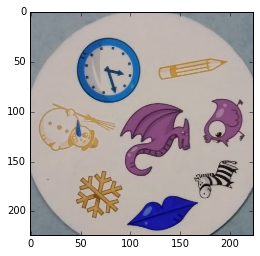

In [10]:

plt.imshow(tr_data[1])

In [20]:
model= Sequential()
model.add(Conv2D(16,(2,2),activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(57, activation='sigmoid'))
model.summary()
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 16)      2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 46656)             0         
__________

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(factor=0.3)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=0.5,
    shear_range=0.1,
    zoom_range=0.4,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

model.fit_generator(datagen.flow(tr_data, OHE_y_train, batch_size=8,save_to_dir='/root/sharedfolder/double/gen_imgs/'),callbacks=[rlrop],
                    validation_data=datagen.flow(tr_data,OHE_y_train),
                    steps_per_epoch=50,validation_steps = 10, epochs=4,verbose=2)

Epoch 1/4
 - 12s - loss: 7.0839 - acc: 0.5566 - val_loss: 7.1319 - val_acc: 0.5536
Epoch 2/4
 - 10s - loss: 7.1916 - acc: 0.5498 - val_loss: 7.1278 - val_acc: 0.5538
Epoch 3/4
 - 10s - loss: 7.0988 - acc: 0.5556 - val_loss: 7.1176 - val_acc: 0.5544
Epoch 4/4
 - 10s - loss: 7.0983 - acc: 0.5557 - val_loss: 7.1258 - val_acc: 0.5539


In [16]:
cd /root/sharedfolder/double/single\ images/

/root/sharedfolder/double/single images


In [17]:
ls

ancore.JPG       dolphin.JPG           light bulb.JPG     sol key.JPG
apple.JPG        double (hand).JPG     lightning.JPG      spider web.JPG
baby bottle.JPG  dragon.JPG            lips.JPG           spider.JPG
beatle.JPG       drop.JPG              lock.JPG           sun.JPG
bird.JPG         exclamation mark.JPG  moon.JPG           sunglasses.JPG
bomb.JPG         eye.JPG               night.JPG          target.JPG
bon fire.JPG     flower.JPG            no entrance.JPG    taxi.JPG
cactus.JPG       ghost.JPG             pencil.JPG         tree.JPG
candle.JPG       green leaf.JPG        puppy.JPG          turtle.JPG
carot.JPG        hammer.JPG            question mark.JPG  yellow cheese.JPG
cat.JPG          heart.JPG             red leaf.JPG       yinyang.JPG
clock.JPG        ice cube.JPG          scissors.JPG       zebra.JPG
clown.JPG        igloo.JPG             skull.JPG
color stain.JPG  key.JPG               snow flake.JPG
dinosour.JPG     knight.JPG            snowman.JPG


In [11]:
single_tr_data = read_train('/root/sharedfolder/double/single images/',80,80,-1)

Read train images


In [27]:
sngl_imgs = [x.split('/')[-1].split('.')[0] for x in glob.glob('/root/sharedfolder/double/single images/'+'*.JPG')]
# sngl_imgs

In [13]:
np.setdiff1d(np.array(y_train.columns),sngl_imgs)

array(['beetle', 'maple leaf', 'yin yang'], dtype=object)

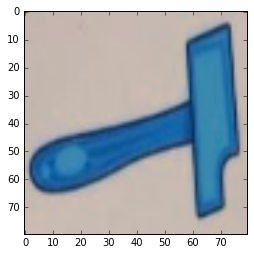

In [14]:
plt.imshow(single_tr_data[0])

In [15]:
from PIL import Image
background = Image.open('/root/sharedfolder/double/gen_imgs/blank.jpg', 'r')
img = Image.open('/root/sharedfolder/double/single images/cat.JPG', 'r')
img_w, img_h = img.size
bg_w, bg_h = background.size
offset = ((bg_w - img_w) / 2, (bg_h - img_h) / 2)
# img = img.rotate(45,resample=Image.NEAREST)
background.paste(img, offset)
background.save('/root/sharedfolder/double/gen_imgs/out.png')

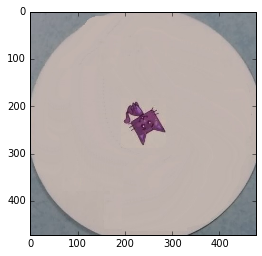

In [17]:
gen = cv2.imread('/root/sharedfolder/double/gen_imgs/out.png')
plt.imshow(gen)

In [47]:
ls /root/sharedfolder/double/gen_imgs/ 

blank.jpg


In [46]:
rm /root/sharedfolder/double/gen_imgs/*.png 

In [48]:
img_rows,img_cols = 80,80
model= Sequential()
model.add(Conv2D(16,(2,2),activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(Flatten())
model.add(Dense(57, activation='sigmoid'))
model.summary()
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

singles_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

model.fit_generator(singles_datagen.flow(single_tr_data[:55], OHE_y_train, batch_size=8,save_to_dir='/root/sharedfolder/double/gen_imgs/'),callbacks=[rlrop],
                    validation_data=singles_datagen.flow(single_tr_data[:55],OHE_y_train),
                    steps_per_epoch=50,validation_steps = 10, epochs=4,verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 79, 79, 16)        208       
_________________________________________________________________
flatten_5 (Flatten)          (None, 99856)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 57)                5691849   
Total params: 5,692,057
Trainable params: 5,692,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
 - 2s - loss: 6.0968 - acc: 0.6176 - val_loss: 5.8618 - val_acc: 0.6333
Epoch 2/4
 - 2s - loss: 5.9757 - acc: 0.6262 - val_loss: 6.0443 - val_acc: 0.6219
Epoch 3/4
 - 1s - loss: 6.0475 - acc: 0.6217 - val_loss: 6.0628 - val_acc: 0.6207
Epoch 4/4
 - 1s - loss: 6.0344 - acc: 0.6225 - val_loss: 6.0362 - val_acc: 0.6224


In [49]:
ls


_0_1171.png   _1_5943.png   _2_3386.png   _3_3647.png   _4_3190.png
_0_1288.png   _1_6679.png   _2_4148.png   _3_4792.png   _4_3602.png
_0_1421.png   _1_6718.png   _2_4308.png   _3_4987.png   _4_3631.png
_0_1717.png   _1_698.png    _2_5200.png   _3_5055.png   _4_3930.png
_0_2012.png   _1_720.png    _2_5662.png   _3_544.png    _4_4015.png
_0_3418.png   _1_7225.png   _2_5999.png   _3_6018.png   _4_4109.png
_0_353.png    _1_7390.png   _2_6358.png   _3_622.png    _4_4430.png
_0_3622.png   _1_7772.png   _2_6367.png   _3_6334.png   _4_4435.png
_0_3778.png   _1_8199.png   _2_6889.png   _3_6377.png   _4_4505.png
_0_4263.png   _1_8358.png   _2_6993.png   _3_6512.png   _4_4605.png
_0_4336.png   _1_8476.png   _2_7113.png   _3_6642.png   _4_464.png
_0_476.png    _1_9522.png   _2_7242.png   _3_6853.png   _4_5176.png
_0_5326.png   _1_9664.png   _2_7501.png   _3_7008.png   _4_5200.png
_0_5487.png   _1_9894.png   _2_777.png    _3_7132.png   _4_5237.png
_0_5557.png   _20_1250.png  _2_7806.png   _3_7267

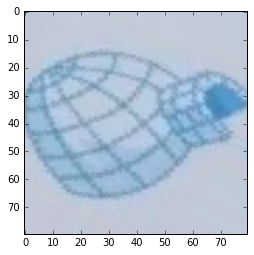

In [52]:
gen = cv2.imread('/root/sharedfolder/double/gen_imgs/_1_9894.png')
plt.imshow(gen)